[View in Colaboratory](https://colab.research.google.com/github/Nourahussein/Plant-seedling-classification/blob/master/FINAL_seedling.ipynb)

**step1:** Download data from [kaggle](https://www.kaggle.com/c/plant-seedlings-classification)  in train.zip file 

**step 2 :**  extract files and sse its contents

In [0]:
url='https://storage.googleapis.com/kaggle-competitions-data/kaggle/7880/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528305589&Signature=dKBdCAaJB39VKclF%2FB99gaXRfl%2Fw5Fu50kDFmtHfxMhs7y257IasCChblvQbhOPlf8PKZBOvGJ87LWG8gEx353PY4i4sOxkjVlas4HuOkZc9lbubyMaqNnLZgdaQVGf6ciy5ctPeK681%2B3808KUT1uL8%2BvCxifX2rNoRDLNEO0mUC4SfsqLrzeS6p8j7oZMWVy71RW1ZtQ3LLjc%2FH1ZB1rRlpvN%2FDqxw0slQ3Yqi41vGGv9twwV%2FKp7hxy2zHu73yCxG9qE2xnTjhzuzIL5wWBdU84eN392FoUjAQy9uULJfC8RgtztyxcK5SS8nssczAxjwfz6ZoDfqtOw4H6uDMg%3D%3D'

In [4]:
from urllib import request
file_name = "train.zip"
request.urlretrieve(url, file_name)

('train.zip', <http.client.HTTPMessage at 0x7fc638bd0128>)

In [6]:
import zipfile as zf
train_zip = zf.ZipFile(file_name)
train_zip.extractall()
!ls

datalab  train	train.zip


In [7]:
#see contents of train file
!ls train


Black-grass  Common Chickweed  Loose Silky-bent   Shepherds Purse
Charlock     Common wheat      Maize		  Small-flowered Cranesbill
Cleavers     Fat Hen	       Scentless Mayweed  Sugar beet


In [8]:
#see contents of black-grass dirctory 
!ls train/Cleavers


005b4a3e3.png  2c5c4d127.png  609c74407.png  94fa687c1.png  c9a021a1a.png
00aa8d5a4.png  2e47c7233.png  61287f47a.png  952540220.png  c9e078b54.png
00df90ed6.png  2e547d792.png  655d1ffdd.png  95a10dd51.png  cb3f058b9.png
01605ed73.png  2e97487c4.png  666fa4f1a.png  98937154f.png  cc2ffb750.png
03bee43c0.png  2f38351b7.png  67afc84df.png  98ad03ef1.png  cc8f45811.png
0515bc601.png  30418535b.png  6820df17f.png  99c858d54.png  cd17d9cd6.png
0522ec53b.png  3232000bf.png  6895ae7c9.png  9b35827fa.png  cf285e97d.png
06f447848.png  323f03521.png  68a24bc47.png  9b8ed8471.png  d17e2cfa1.png
0756fd41e.png  33c1f167f.png  68a3d6b27.png  9b941ac1b.png  d20d68489.png
07ac7bc07.png  33d0d3358.png  6a4ef17c2.png  9c337ab7a.png  d3a7492ff.png
0920492fd.png  34648ed0b.png  6acdb8e68.png  9d763f383.png  d4552e3f6.png
09da4f213.png  34f210a03.png  6bcc0c252.png  9e250b25f.png  d4803dca4.png
0a1e622bc.png  3516267fc.png  6c10be2a7.png  9e899d1ee.png  d55caa949.png
0a33283c7.png  360f883f6.png  6cd9902c

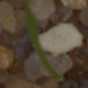

In [9]:
#see sample (an image)
#import Image
from PIL import Image

image = Image.open('train/Black-grass/69ad6773e.png')
image 


***save zip file in drive to be used in next time using its id ***

In [13]:

# Install the PyDrive wrapper & import libraries.
#!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

file_to_save = drive.CreateFile({'name': "train.zip"})
file_to_save.Upload()
file_to_save.get('id')

'1QLw70JSeTfD0ML8qzs_b-ELZTuqyj-k7'

In [0]:
#change dirctory 
#import os 
#os.chdir("train")
#cwd = os.getcwd()


In [0]:
#list of useful imports that  I will use
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import pandas as pd

In [0]:
#save the path into variable to use it easily next times.
TRAin_DATA_FOLDER= "train"

**Read images**

In [0]:
images = []
classes=[]
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None:
          continue
        images.append(image_bgr)
        
        classes.append(class_label)
        
        

In [0]:
shapes = [img.shape for img in images]
shapes_sum = [np.sum(img.shape) for img in images]

**number of images per class**



In [7]:
shapes[np.argmax(shapes_sum)]

(3457, 3991, 3)

In [8]:
#see number of images in each lablel

images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):
  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))
  

images shape:  (4750,)
classes shape:  (4750,)
number of Scentless Mayweed images is  -> 516
number of Shepherds Purse images is  -> 231
number of Fat Hen images is  -> 475
number of Small-flowered Cranesbill images is  -> 496
number of Common wheat images is  -> 221
number of Maize images is  -> 221
number of Sugar beet images is  -> 385
number of Cleavers images is  -> 287
number of Charlock images is  -> 390
number of Common Chickweed images is  -> 611
number of Loose Silky-bent images is  -> 654
number of Black-grass images is  -> 263


**see some inputs of images **

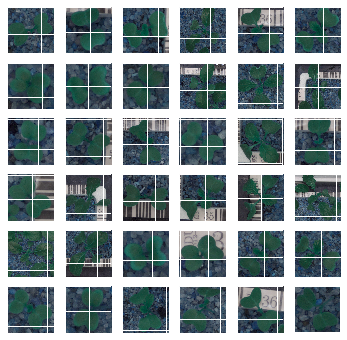

In [9]:
def plot_for_class(label):
    nb_rows = 6
    nb_cols = 6
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))
    class_images =images[classes == label]
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(class_images[n])
            n += 1 
plot_for_class("Charlock")

**Normlizing png images**

In [11]:
def resize_images(image_to_resize):

  img = cv2.imread(image_to_resize)
  res = cv2.resize(img1,None,fx=128 , fy=128, interpolation = cv2.INTER_CUBIC)
  return res
resized=[]
for image in images:
  ressized= resize_images(images[image])

TypeError: ignored

In [0]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp
def resize_images(image):
  img = cv2.imread(image)
  res = cv2.resize(img,None,fx=176, fy=176, interpolation = cv2.INTER_CUBIC)
  return res



In [0]:
import numpy as np
sensitivity = 35
lower_hsv = np.array([60 - sensitivity, 100, 50])
upper_hsv = np.array([60 + sensitivity, 255, 255])


In [0]:
for image in images:
  image_mask = create_mask_for_plant(image)
  image_segmented = segment_plant(image)
  image_sharpen = sharpen_image(image_segmented)

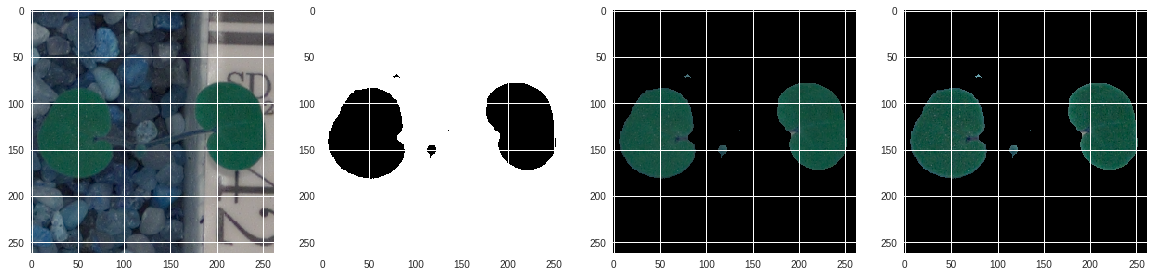

In [57]:
image = images[classes == "Small-flowered Cranesbill"][20]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

In [40]:
label_names=[]
for class_label in images_per_class.keys():
    label_names.append(class_label)
    
print(label_names)

['Cleavers', 'Fat Hen', 'Charlock', 'Common wheat', 'Loose Silky-bent', 'Small-flowered Cranesbill', 'Scentless Mayweed', 'Common Chickweed', 'Black-grass', 'Shepherds Purse', 'Sugar beet', 'Maize', '851c90831.png', '721be0a4a.png', 'ce3d280eb.png', '00d090cde.png', '3efa1f66c.png', 'b828443ff.png', 'e901b0f28.png', '866be78b0.png', '9c32a797e.png', '2ea664465.png', '37e545a60.png', 'f33e9d918.png', 'b687160f5.png', '6049234e6.png', '9b4800b42.png', 'e1abb4ff9.png', '5b63dcc21.png', '20e562fd5.png', 'aee6fa3df.png', '4f83143e1.png', 'eec1079a1.png', '2df78338c.png', 'e3f50adfc.png', '1541bdb2e.png', '56a01b835.png', '2d5058a59.png', 'ef74dbcad.png', '5b3beec58.png', 'f66ae4070.png', '03a2ee656.png', '8f523520c.png', '592cc5b89.png', '558aa7deb.png', '8d6991365.png', '007b3da8b.png', '63c07d340.png', 'f9ea23fb5.png', '55920f07f.png', '39858776a.png', '060f1dc84.png', '93079d970.png', '6d6eb3830.png', '808cf55c6.png', '6b9d6f8c9.png', '391dcd7fd.png', '172f9b10b.png', '9cce7328c.png', '5

**Split  data into train and test**


In [0]:
images_arr = np.apply_along_axis(np.pad, 0, images, (3457, 3991), 'constant', constant_values=0)

In [63]:
images.shape

(4749,)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, classes, test_size=0.2, random_state=50)

In [48]:
X_train.shape

(3799,)

In [0]:

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

batch_size = 32

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu', batch_input_shape = (batch_size,None, None, 3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (32, None, None, 32)      2432      
_________________________________________________________________
conv2d_11 (Conv2D)           (32, None, None, 32)      25632     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (32, None, None, 32)      0         
_________________________________________________________________
dropout_6 (Dropout)          (32, None, None, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (32, None, None, 64)      18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (32, None, None, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (32, None, None, 64)      0         
__________

In [0]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [0]:
print(images[0].shape)
images_arr = np.zeros((images.shape[0], 176, 176, 3))
print(images_arr.shape)

for i, img in enumerate(images):
  images_arr[i] = img
  
print(images_arr.shape)

(176, 176, 3)


In [53]:
model.fit(X_train, y_train, epochs = 1, batch_size = batch_size)

ValueError: ignored